# 项目四 基于线性回归算法的预测模型

## 项目实训

### 线性回归模型的应用

#### 本任务的目标是：调用线性回归算法拟合生成的数据，得到线性方程。

##### 1．生成用于回归分析的有1个特征的数据集

In [1]:
import numpy as np
#导入绘图工具
import matplotlib.pyplot as plt
#导入回归数据生成器
from sklearn.datasets import make_regression
#导入线性回归模型
from sklearn.linear_model import LinearRegression
#导入均方误差评估模块
from sklearn.metrics import mean_squared_error
#生成用于回归分析的数据集
X,y = make_regression(n_samples=50,n_features=1,n_informative=1,random_state=3,noise=50)

##### 2．使用线性回归模型对数据进行拟合

In [2]:
#使用线性模型对数据进行拟合
lr = LinearRegression()
lr.fit(X,y)

LinearRegression()

##### 3．画出线性回归模型的图形

Text(0.5, 1.0, '线性回归')

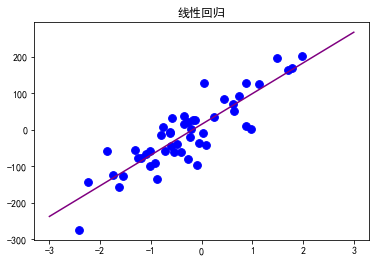

In [4]:
#z是我们生成的等差数列，用来画出线性模型的图形
z = np.linspace(-3,3,100).reshape(-1,1)
plt.scatter(X,y,c='b',s=60)
plt.plot(z,lr.predict(z),c='purple')

# 默认不支持中文
# 修改RC参数，来让其支持中文
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
plt.title('线性回归')

##### 4．输出线性回归模型的系数、截距和方程

In [5]:
print('代码运行结果：\n')
print('==============================')
print('直线的斜率是:{:.2f}'.format(lr.coef_[0]))
print('直线的截距是: {:.2f}'.format(lr.intercept_))
print('直线方程为：y = {:.2f}'.format(lr.coef_[0]),'x','+ {:.2f}'.format(lr.intercept_))
print('==============================')

代码运行结果：

直线的斜率是:84.16
直线的截距是: 14.48
直线方程为：y = 84.16 x + 14.48


##### 5．生成用于回归分析的有2个特征的数据集

In [7]:
#导入数据集拆分工具
from sklearn.model_selection import train_test_split
#生成用于回归分析的有2个特征的数据集
X,y = make_regression(n_samples=100,n_features=2,n_informative=2,random_state=38)

##### 6．使用线性回归模型对数据进行拟合，并输出线性回归模型的系数、截距

In [8]:
#拆分数据
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=8)
#训练模型
lr2 = LinearRegression().fit(X_train,y_train)
#预测数据
y_predict = lr2.predict(X_test)

print('')
print('==============================')
print('lr2.coef_:{}'.format(lr2.coef_[:]))
print('lr2.intercept_: {}'.format(lr.intercept_))
print('==============================')


lr2.coef_:[70.38592453  7.43213621]
lr2.intercept_: 14.475840238473038


##### 7．线性回归模型的性能评估

In [9]:
#均方误差评估
mse = mean_squared_error(y_test, y_predict)
print('')
print('==============================')
print("均方误差为：\n", mse)
print('==============================')


均方误差为：
 3.992582813504585e-28


### 波士顿房价预测

#### 本任务的目标是：使用scikit-learn内置的波士顿房价数据集作为训练数据集，用线性回归模型对数据进行拟合，对房价进行预测，并绘制真实房价与预测房价走势图。

##### 1．数据集探索

In [6]:
#导入波士顿房价模块
from sklearn.datasets import load_boston
#导入boston数据集
boston = load_boston()
#输出boston数据集中的键
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [7]:
#输出数据的维度
boston['data'].shape

(506, 13)

In [8]:
#输出boston数据集中的描述
print(boston['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

##### 2．用线性回归模型拟合数据并进行预测

In [9]:
#导入数据集拆分工具
from sklearn.model_selection import train_test_split
#将数据集分拆分为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(boston.data, boston.target, random_state=36)
#构建模型
lr_boston = LinearRegression()
#训练模型
lr_boston.fit(X_train, y_train)
#预测数据
y_predict = lr_boston.predict(X_test)

##### 3．对模型进行评估

In [10]:
#导入均方误差评估模块
from sklearn.metrics import mean_squared_error
#均方误差评估
mse = mean_squared_error(y_test, y_predict)
print("线性回归模型的均方误差为：\n", mse)

线性回归模型的均方误差为：
 24.004430052241922


##### 4．输出线性回归模型的系数和偏置

In [13]:
print('')
print('==============================')
print('lr_boston.coef_:{}'.format(lr_boston.coef_[:]))
print('lr_boston.intercept_: {}'.format(lr_boston.intercept_))
print('==============================')


lr_boston.coef_:[-9.97859985e-02  4.36000046e-02  3.83811635e-02  3.45187835e+00
 -1.64404146e+01  3.96312862e+00 -7.41840830e-03 -1.50795571e+00
  2.60346433e-01 -1.07545027e-02 -9.71955449e-01  1.17777648e-02
 -5.40689068e-01]
lr_boston.intercept_: 34.67625828318796


##### 5．绘制波士顿真实房价与预测房价走势图

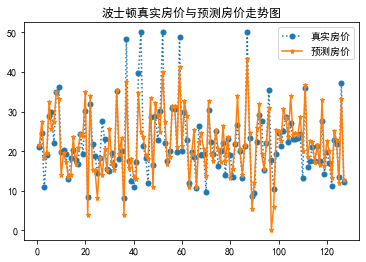

In [14]:
# 创建画布
plt.figure()
# 默认不支持中文
# 修改RC参数，来让其支持中文
plt.rcParams['font.sans-serif'] = 'SimHei'
plt.rcParams['axes.unicode_minus'] = False
# 绘图
x = np.arange(1, y_predict.shape[0] + 1)
# 真实值的走势
plt.plot(x, y_test, marker="o", linestyle=":", markersize=5)
# 预测值的走势
plt.plot(x, y_predict, marker="*", markersize=5)
 
# 添加图例
plt.legend(["真实房价", "预测房价"])
# 添加标题
plt.title("波士顿真实房价与预测房价走势图")

# 展示
plt.show()

###  岭回归模型的应用

#### 本任务的目标是：继续使用波士顿房价数据集，这次使用岭回归模型对数据进行拟合。

In [15]:
#导入岭回归模型
from sklearn.linear_model import Ridge
#使用岭回归模型对数据进行拟合
ridge = Ridge(alpha=1.0)
#训练数据
ridge.fit(X_train, y_train)
#预测数据
y_predict_ridge = ridge.predict(X_test)

In [16]:
print('')
print('==============================')
print('ridge.coef_:{}'.format(ridge.coef_[:]))
print('ridge.intercept_: {}'.format(ridge.intercept_))
print('==============================')


ridge.coef_:[-0.0953679   0.04589527  0.01069857  3.07060892 -8.77412032  3.98898723
 -0.01323409 -1.39995633  0.24580113 -0.0116064  -0.88526616  0.01204574
 -0.5596903 ]
ridge.intercept_: 29.558076258955204


In [17]:
#岭回归模型的均方误差
mse_rid = mean_squared_error(y_test, y_predict_ridge)
print("岭回归模型的均方误差为：\n", mse_rid)

岭回归模型的均方误差为：
 24.343021993564516


### 套索回归模型的应用

#### 本任务的目标是：继续使用波士顿房价数据集，这次使用套索回归模型对数据进行拟合。

In [18]:
#导入套索回归模型
from sklearn.linear_model import Lasso
#使用套索回归模型对数据进行拟合
lasso = Lasso()
lasso.fit(X_train, y_train)
y_predict = lasso.predict(X_test)

In [19]:
print('')
print('==============================')
print('lasso.coef_:{}'.format(lasso.coef_[:]))
print('lasso.intercept_: {}'.format(lasso.intercept_))
print('==============================')


lasso.coef_:[-0.05667701  0.04951008  0.          0.         -0.          0.90690771
  0.015408   -0.78938302  0.20376589 -0.01209622 -0.75278709  0.00998691
 -0.80797632]
lasso.intercept_: 41.95188297539425


In [20]:
mse_las = mean_squared_error(y_test, y_predict)
print("套索回归模型的均方误差为：\n", mse_las)

套索回归模型的均方误差为：
 28.036747383198307


## 项目拓展—糖尿病患者病情预测

#### 本任务的目标是：使用scikit-learn内置的糖尿病患者病情数据集作为训练数据集，首先用线性回归模型对数据进行拟合，然后使用岭回归模型对数据进行拟合，并尝试对比不同alpha值的岭回归模型对模型系数的影响，学习调节模型参数。

##### 1．数据探索

In [21]:
#导入糖尿病患者病情模块
from sklearn.datasets import load_diabetes
#导入数据集拆分工具
from sklearn.model_selection import train_test_split
#导入绘图模块
import matplotlib.pyplot as plt
#均方误差评估模块
from sklearn.metrics import mean_squared_error
#导入数据集
diabetes = load_diabetes()
#打输出糖尿病数据集中的键
diabetes.keys()

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename'])

In [22]:
#输出数据的维度
diabetes['data'].shape

(442, 10)

In [23]:
#输出数据详细描述
print(diabetes['DESCR'])

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, T-Cells (a type of white blood cells)
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, thyroid stimulating hormone
      - s5      ltg, lamotrigine
      - s6      glu, blood sugar level

Note: Each of these 10 feature va

##### 2．用线性回归模型拟合数据并进行预测和评估

In [24]:
#导入特征变量
X = diabetes['data']
#导入目标变量
y = diabetes['target']
#将数据集拆分为训练集和测试集
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=8)
#创建线性模型对象
diabetes_lr = LinearRegression()
#训练模型
diabetes_lr.fit(X_train,y_train)
#预测数据
y_predict = diabetes_lr.predict(X_test)

In [25]:
mse = mean_squared_error(y_test, y_predict)
print("均方误差为：\n", mse)
print('')
print('==============================')
print('coef_:{}'.format(diabetes_lr.coef_[:]))
print('intercept_: {}'.format(diabetes_lr.intercept_))
print('==============================')

均方误差为：
 3108.04109825321

coef_:[   11.5106203   -282.51347161   534.20455671   401.73142674
 -1043.89718398   634.92464089   186.43262636   204.93373199
   762.47149733    91.9460394 ]
intercept_: 152.5624877455247


##### 3．用岭回归模型拟合数据并进行预测和评估

In [26]:
from sklearn.linear_model import Ridge
#创建岭回归模型对象
diabetes_ridge = Ridge(alpha=1.0)
#训练模型
diabetes_ridge.fit(X_train,y_train)
#预测数据
y_predict_1 = diabetes_ridge.predict(X_test)

In [27]:
mse_1 = mean_squared_error(y_test, y_predict_1)
print("均方误差为：\n", mse_1)
print('')
print('==============================')
print('coef_:{}'.format(diabetes_ridge.coef_[:]))
print('intercept_: {}'.format(diabetes_ridge.intercept_))
print('==============================')

均方误差为：
 3262.2329203221525

coef_:[  36.8262072   -75.80823733  282.42652716  207.39314972   -1.46580263
  -27.81750835 -134.3740951    98.97724793  222.67543268  117.97255343]
intercept_: 152.553545058867


In [28]:
#创建alpha=10的岭回归模型
diabetes_ridge10 = Ridge(alpha=10)
#训练模型
diabetes_ridge10.fit(X_train,y_train)
#预测数据
y_predict_10 = diabetes_ridge10.predict(X_test)

In [29]:
mse_10 = mean_squared_error(y_test, y_predict_10)
print("均方误差为：\n", mse_10)
print('')
print('==============================')
print('coef_:{}'.format(diabetes_ridge10.coef_[:]))
print('intercept_: {}'.format(diabetes_ridge10.intercept_))
print('==============================')

均方误差为：
 4817.2518226162565

coef_:[ 15.08676646  -1.9586191   60.69903425  47.11843221  14.72337546
   9.87779644 -35.56015266  35.74603575  54.27193163  37.42095846]
intercept_: 152.7585777843719


In [30]:
#创建alpha=0.1的岭回归模型
diabetes_ridge01 = Ridge(alpha=0.1)
#训练模型
diabetes_ridge01.fit(X_train,y_train)
#预测数据
y_predict_01 = diabetes_ridge01.predict(X_test)

In [31]:
mse_01 = mean_squared_error(y_test, y_predict_01)
print("均方误差为：\n", mse_01)
print('')
print('==============================')
print('coef_:{}'.format(diabetes_ridge01.coef_[:]))
print('intercept_: {}'.format(diabetes_ridge01.intercept_))
print('==============================')

均方误差为：
 3027.227167970087

coef_:[  24.77802114 -228.33364296  495.54594378  361.21481169 -109.82542594
  -78.3286822  -190.69780344  108.24040795  383.72269392  107.42593373]
intercept_: 152.4809383696352


##### 4．绘制不同alpha参数的岭回归模型中的coef_属性

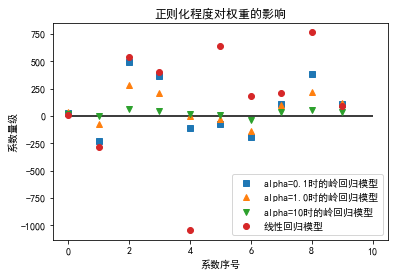

In [32]:
# 创建画布
plt.figure()
# 默认不支持中文
# 修改RC参数，来让其支持中文
plt.rcParams['font.sans-serif'] = 'SimHei'
plt.rcParams['axes.unicode_minus'] = False
# 绘图
x = np.arange(0,10)

# alpha=0.1
plt.plot(x, diabetes_ridge01.coef_, 's',label='alpha=0.1时的岭回归模型')
# alpha=1.0
plt.plot(x, diabetes_ridge.coef_,'^',label='alpha=1.0时的岭回归模型')
# alpha=10
plt.plot(x, diabetes_ridge10.coef_,'v',label='alpha=10时的岭回归模型')
#线性回归
plt.plot(x, diabetes_lr.coef_,'o',label='线性回归模型')
 
# 添加图例
plt.legend( )
# 添加标题
plt.title("正则化程度对权重的影响")
plt.xlabel('系数序号')
plt.ylabel('系数量级')
plt.hlines(0,0,len(diabetes_lr.coef_))

plt.show()